# Project 1: Gradient-based Algorithms and Differentiable Programming


## 1. Introduction
Consider a simple formulation of rocket landing where the rocket state $x(t)$ is represented by its distance to the ground $d(t)$ and its velocity $v(t)$, i.e., $x(t) = [d(t), v(t)]^T$, where $t$ specifies time. The control input of the rocket is its acceleration $a(t)$. The discrete-time dynamics follows 

$$
\begin{aligned}
d(t+1) = d(t) + v(t) \Delta t, \\
v(t+1) = v(t) + a(t) \Delta t,
\end{aligned}
$$

where $\Delta t$ is a time interval. Further, let the closed-loop controller be 

$$
a(t) = f_{\theta}(x(t))
$$

where $f_{\theta}(\cdot)$ is a neural network with parameters $\theta$, which are to be determined through optimization.

For each time step, we assign a loss as a function of the control input and the state: $l(x(t),a(t))$. In this example, we will simply set $l(x(t),a(t))=0$ for all $t=1,...,T-1$, where $T$ is the final time step, and $l(x(T),a(T)) = ||x(T)||^2 = d(T)^2 + v(T)^2$. This loss encourages the rocket to reach $d(T)=0$ and $v(T)=0$, which are proper landing conditions.

The optimization problem is now formulated as

$$
\begin{aligned}
\min_{\theta} \quad & ||x(T)||^2 \\
\quad & d(t+1) = d(t) + v(t) \Delta t, \\
\quad & v(t+1) = v(t) + a(t) \Delta t, \\
\quad & a(t) = f_{\theta}(x(t)), ~\forall t=1,...,T-1
\end{aligned}
$$

While this problem is constrained, it is easy to see that the objective function can be expressed as a function of $x(T-1) and a(T-1)$, where $x(T-1)$ as a function of $x(T-2)$ and $a(T-2)$, and so on. Thus it is essentially an unconstrained problem with respect to $\theta$. 

In the following, we code this problem up with [PyTorch](https://pytorch.org/), which allows us to only build the forward pass of the loss (i.e., how we move from $x(1)$ to $x(2)$ and all the way to $x(T)$) and automatically get the gradient $\nabla_{\theta} l(x(T),a(T))$.

---



###2.Problem Formulation
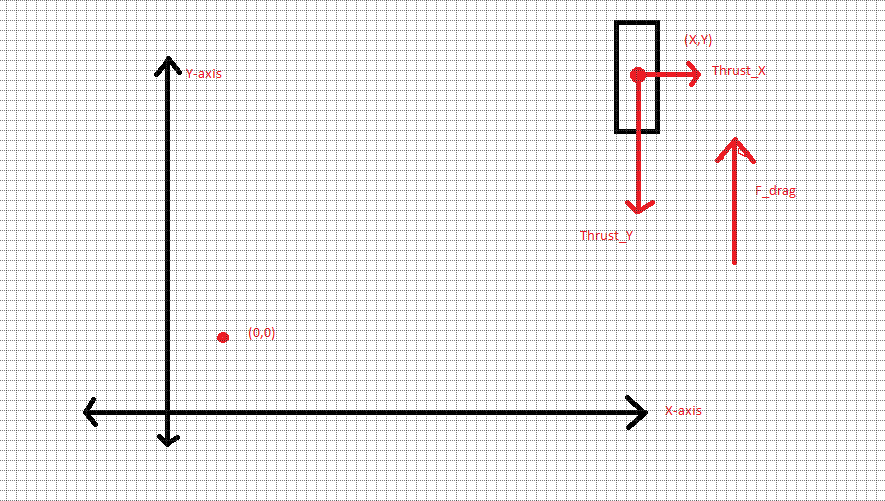

##Description
The rocket is supposed to land at (0,0) at a stable base. The forces acting on the rocket body are the thrust forces by thrusters in X and Y directions.
The rocket is at (20,10) meters and is descending with a velocity of (-2,1)m/s.



##Objective function



$$
\begin{aligned}
\quad\min_{\theta} & ||s(T)||^2 
\end{aligned}
$$
where,
$$
\begin{aligned}
\quad & s(T) = (x(T), y(T), v_x(T), v_y(T))
\end{aligned}
$$


Parameters
$g$: Gravity acceleration,

$a_m$:maximum acceleration,

$T$: Total time,

$d_t$: Time increment,

### Variables:
$t$: Time,

$s$: State,

$x$: x co-ordinate,

$v_x$: Velocity in x direction,

$a_x$: Acceleration in x direction,

$y$: y co-ordinate,

$v_y$: Velocity in y direction,

$a_y$: Acceleration in x direction,

$R_x$: Thrust state in x direction. range (-1, +1).
{$R_x = -1$ means max thrust to left, $R_x = 0 $ means no thrust, $R_x = 1$ means max thrust to right}

$R_y$: Thrust state in y direction. range (0, 1). {$R_y = 0$ means no thrust. $R_y = 1$ means max thrust}
### Constraints:

$$
\begin{aligned}
\quad & x(t+1) = x(t) + v_x(t) \Delta t, \\
\quad & y(t+1) = x(t) + v_y(t) \Delta t, \\
\quad & v_x(t+1) = v_x(t) + a_x(t) \Delta t, \\
\quad & v_y(t+1) = v_y(t) + a_y(t) \Delta t, \\
\quad & a_x(t+1) = a_m R_x(t) \Delta t, \\
\quad & a_y(t+1) = -g + a_m R_y(t) \Delta t-a_mdrag(t)\Delta t, \\
\quad & R_x(t), R_y(t) = f_{\theta}(s(t)), ~\forall t=1,...,T-1 
\end{aligned}
$$

  Drag force: D = Cd * A * .5 * r * V^2
    Rocket in assumption is falcon 9
    Cd = 0.25 (Drag co-efficint of long cyclinder with a cone nose) 
    ref: https://space.stackexchange.com/questions/16883/whats-the-atmospheric-drag-coefficient-of-a-falcon-9-at-launch-sub-sonic-larg

    A = pi * 12 feet ^2 (Diameter of falcon 9) = 34 m^2
    r = 850 kg/m^3 (Density of steel)
    V = velocity = delta state
    m = 549054 Kg (Mass of falcon 9)
        
    D = 0.25 * 34 * 0.5 * 850 * delta_state^2
    
    now from figure , force body diagram 
    
    m * drag_decel (deceleration due to drag) = D
    drag_decel = 0.00658 * delta_state^2

[1] loss: 73417.141


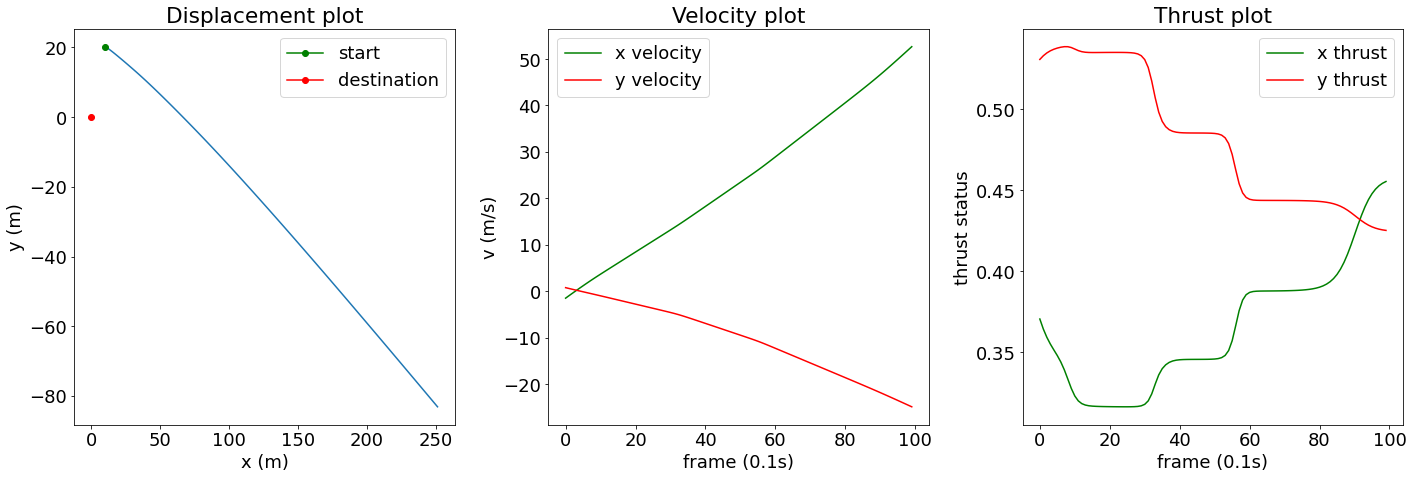

[2] loss: 41634.043
[3] loss: 29801.291
[4] loss: 20960.545
[5] loss: 14861.501
[6] loss: 11006.796
[7] loss: 8375.578
[8] loss: 6604.179
[9] loss: 5350.786
[10] loss: 4313.946
[11] loss: 3255.005


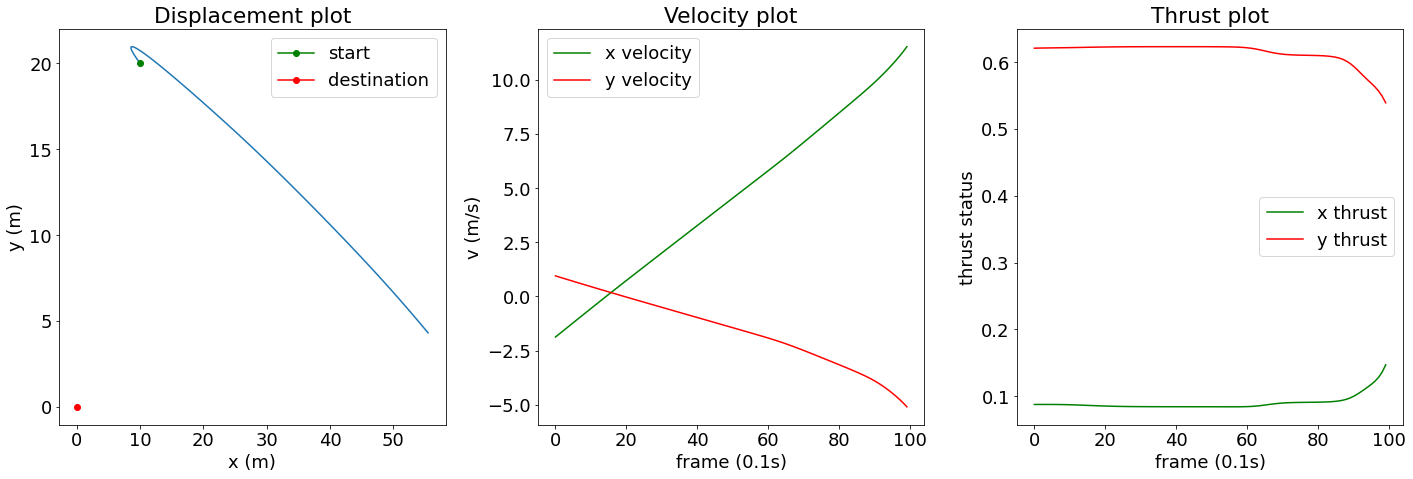

[12] loss: 2407.371
[13] loss: 1533.812
[14] loss: 1073.674
[15] loss: 877.240
[16] loss: 707.325
[17] loss: 507.482
[18] loss: 370.945
[19] loss: 290.158
[20] loss: 238.427
[21] loss: 200.234


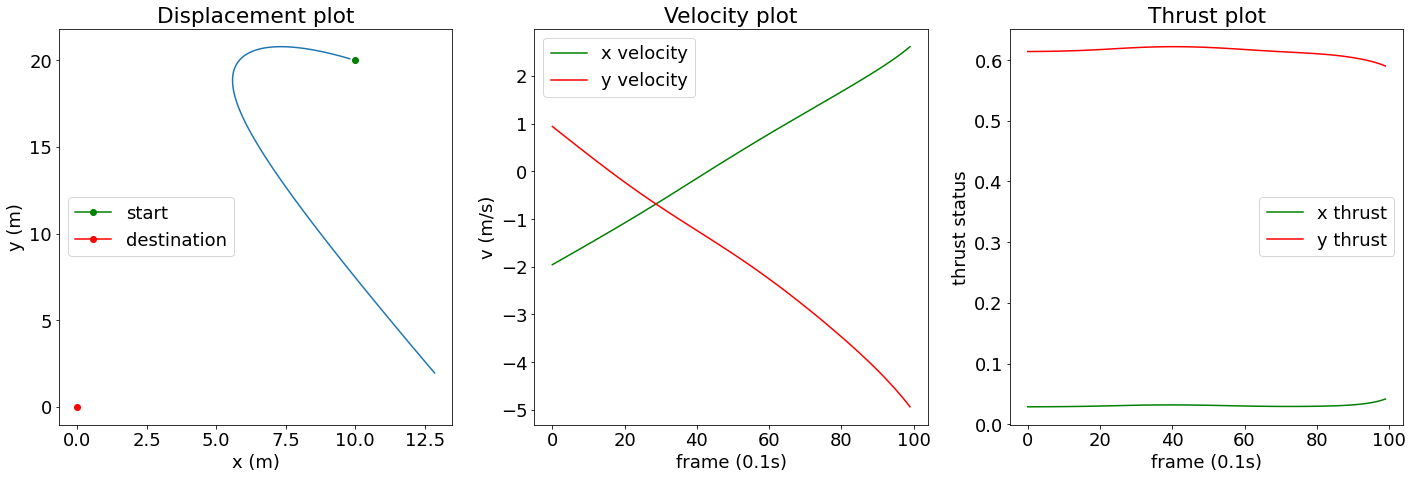

[22] loss: 166.130
[23] loss: 123.869
[24] loss: 98.149
[25] loss: 82.424
[26] loss: 70.899
[27] loss: 61.244
[28] loss: 50.398
[29] loss: 36.215
[30] loss: 27.673
[31] loss: 22.376


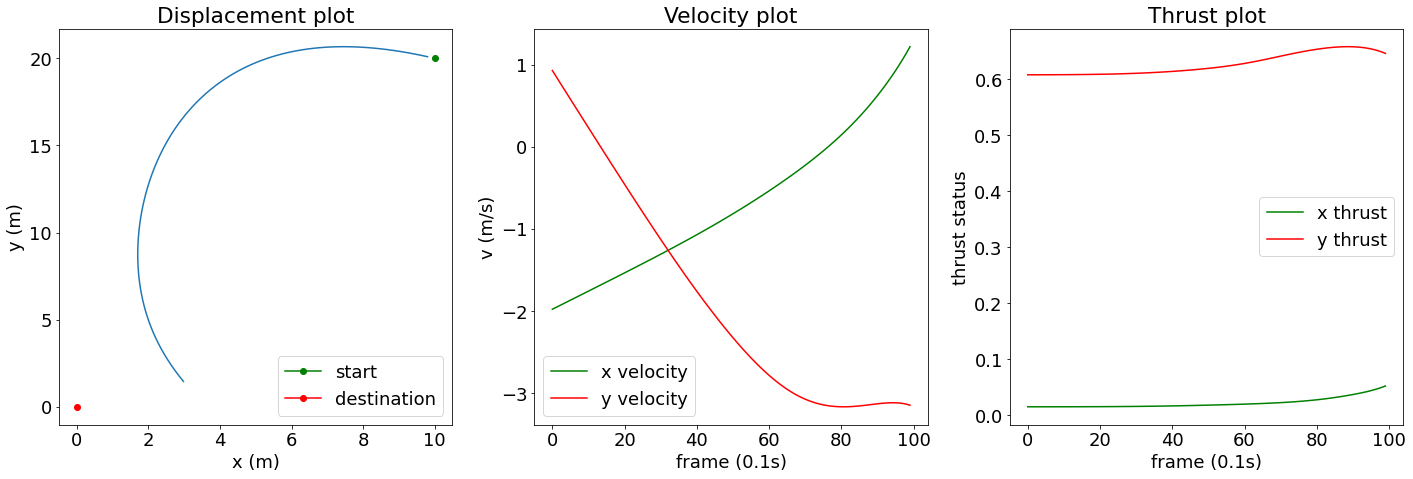

[32] loss: 18.330
[33] loss: 15.067
[34] loss: 12.177
[35] loss: 9.883
[36] loss: 8.238
[37] loss: 6.980
[38] loss: 5.960
[39] loss: 5.107
[40] loss: 4.397
[41] loss: 3.848


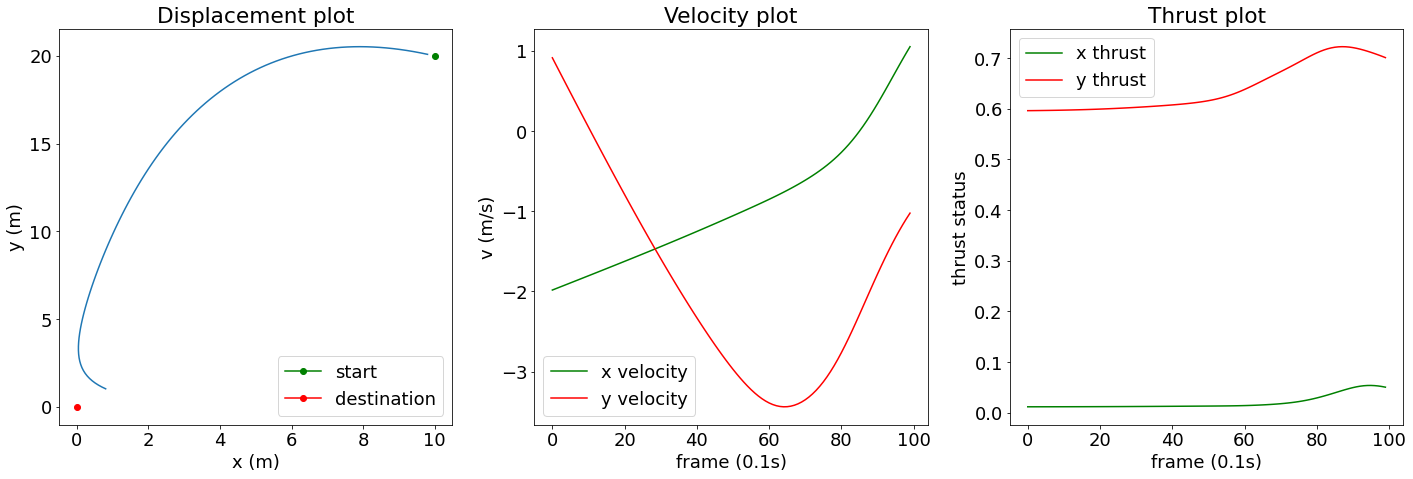

[42] loss: 3.415
[43] loss: 3.024
[44] loss: 2.630
[45] loss: 2.291
[46] loss: 1.998
[47] loss: 1.743
[48] loss: 1.519
[49] loss: 1.322
[50] loss: 1.155
[51] loss: 1.000


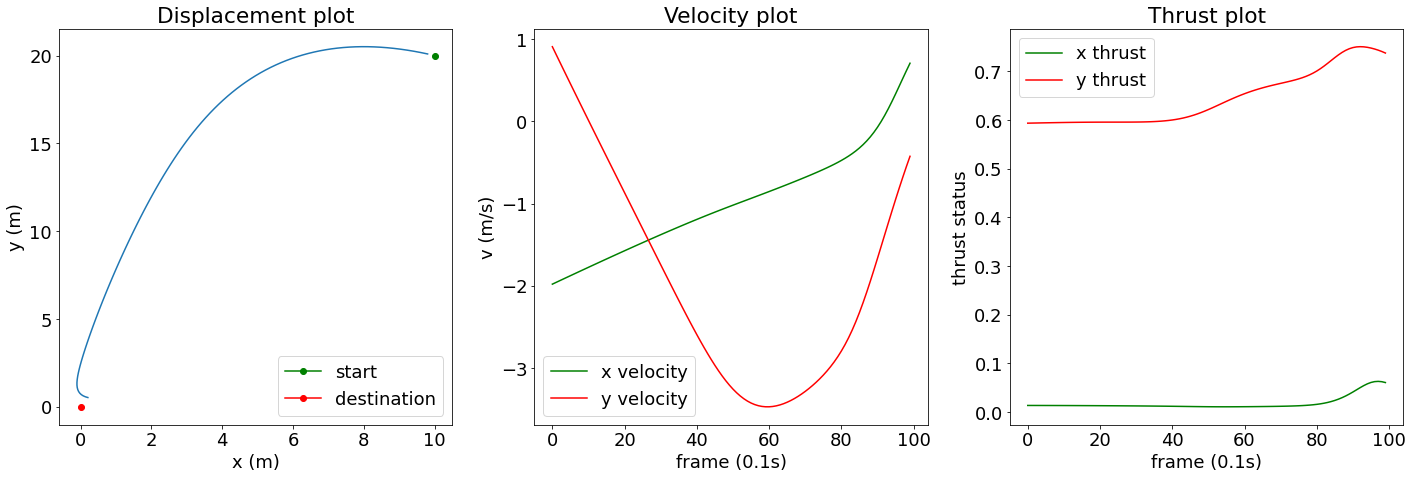

[52] loss: 0.853
[53] loss: 0.729
[54] loss: 0.628
[55] loss: 0.544
[56] loss: 0.473
[57] loss: 0.414
[58] loss: 0.364
[59] loss: 0.321
[60] loss: 0.285
[61] loss: 0.252


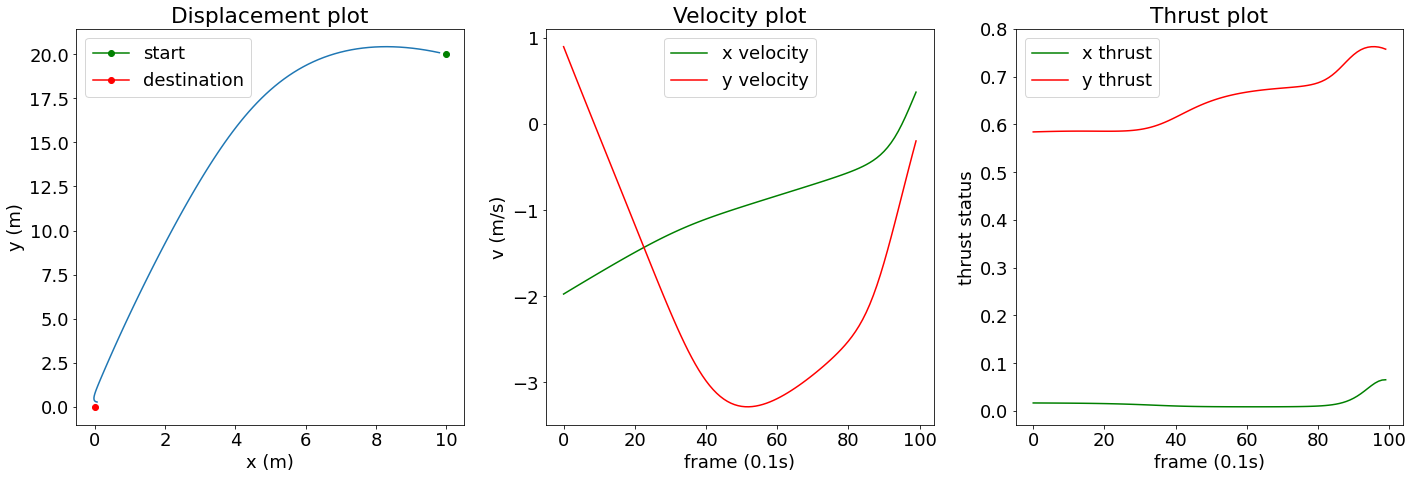

[62] loss: 0.222
[63] loss: 0.196
[64] loss: 0.171
[65] loss: 0.149
[66] loss: 0.130
[67] loss: 0.112
[68] loss: 0.096
[69] loss: 0.082
[70] loss: 0.070
[71] loss: 0.060


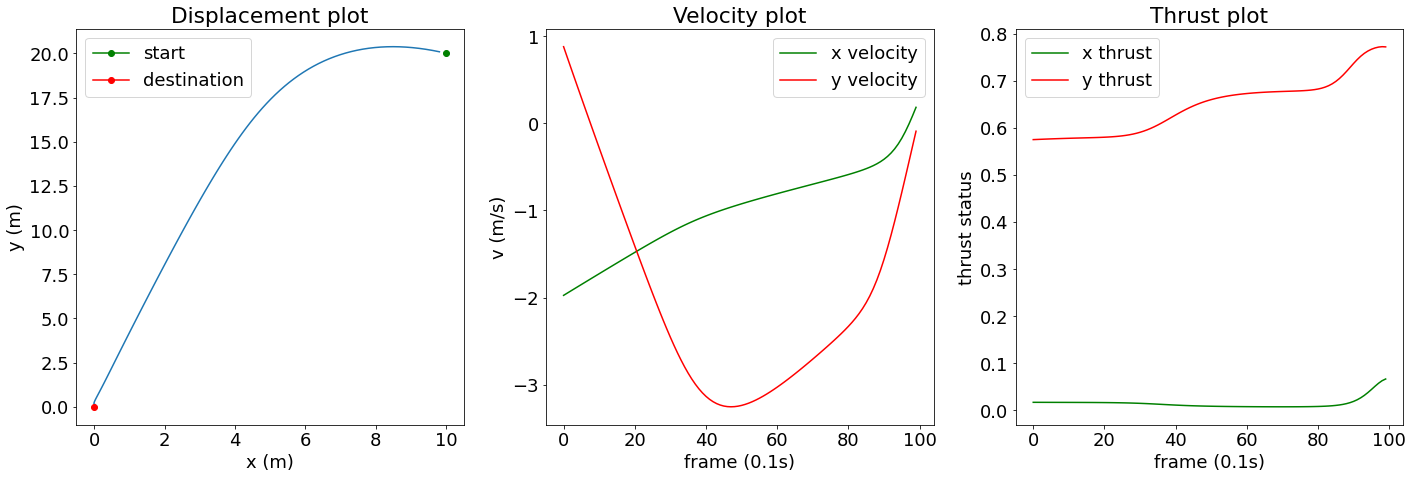

[72] loss: 0.050
[73] loss: 0.042
[74] loss: 0.036
[75] loss: 0.030
[76] loss: 0.025
[77] loss: 0.021
[78] loss: 0.017
[79] loss: 0.014
[80] loss: 0.012
[81] loss: 0.010


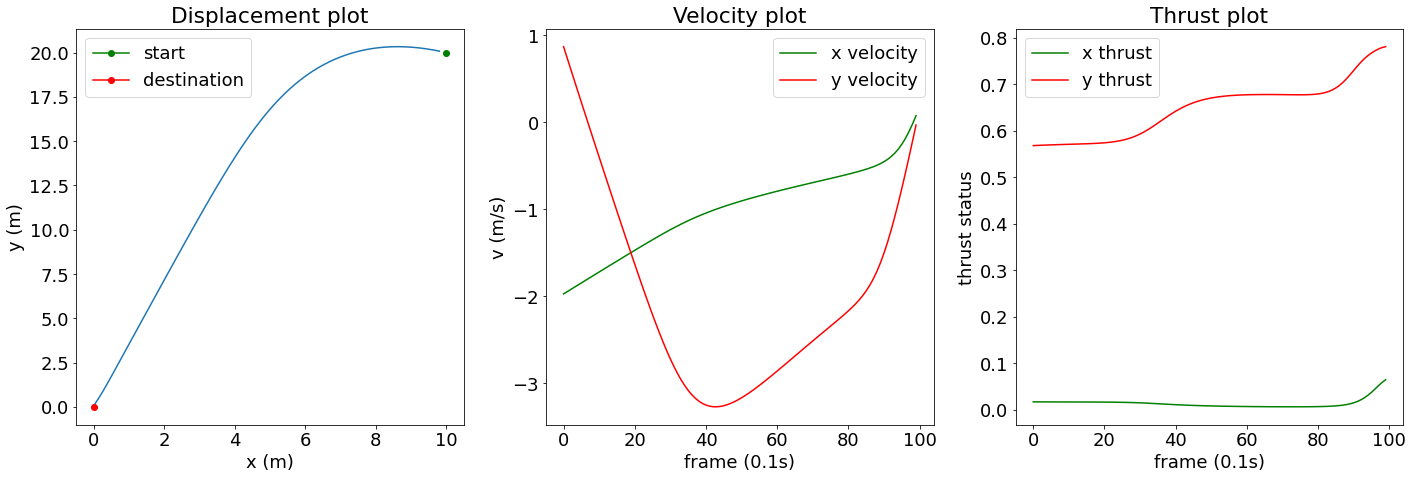

[82] loss: 0.007
[83] loss: 0.005
[84] loss: 0.004
[85] loss: 0.004
[86] loss: 0.003
[87] loss: 0.002
[88] loss: 0.002
[89] loss: 0.002
[90] loss: 0.001
[91] loss: 0.001


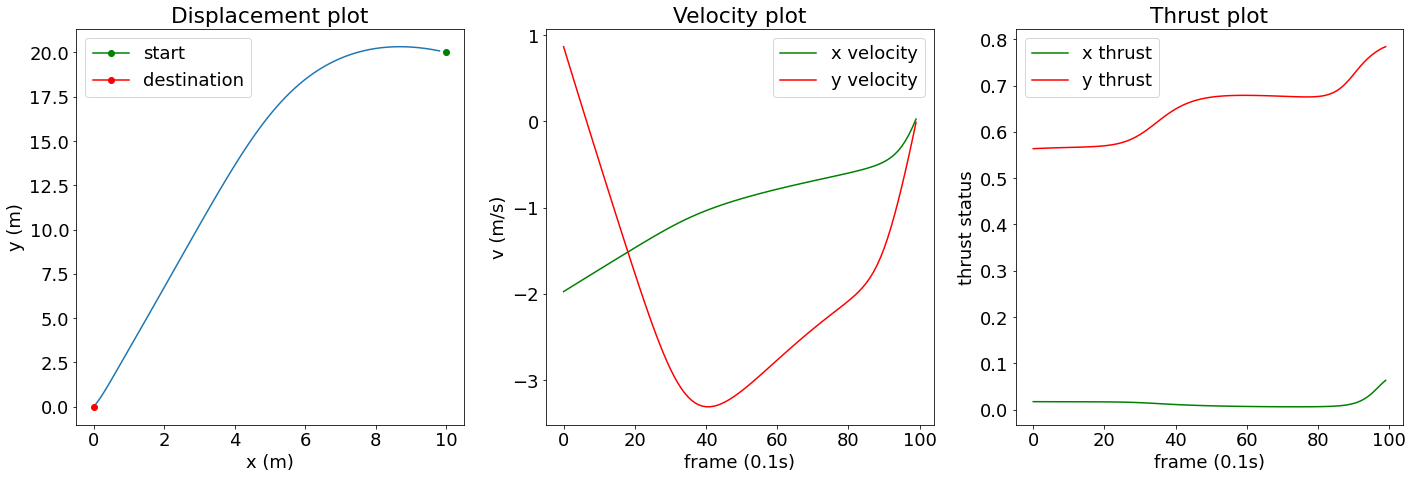

[92] loss: 0.001
[93] loss: 0.001
[94] loss: 0.001
[95] loss: 0.000
[96] loss: 0.000
[97] loss: 0.000
[98] loss: 0.000
[99] loss: 0.000
[100] loss: 0.000


In [4]:
# overhead
import logging
import math
import random
import numpy as np
import time
import torch as t
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt
logger = logging.getLogger(__name__)
plt.rcParams.update({'font.size': 18})
# environment parameters
FRAME_TIME = 0.1  # second, time interval
GRAVITY_ACCEL = 9.81  # m/s2, gravity constant
BOOST_ACCEL = 15.0  # m/s2, thrust constant

# define system dynamics

class Dynamics(nn.Module):

    def __init__(self):
        super(Dynamics, self).__init__()

    @staticmethod
    def forward(state, action):

        """
        action:
        action[0]: thrust in x direction. 
        action[1]: thrust in y direction. 
        
        states:
        state[0] = x
        state[1] = v_x
        state[2] = y
        state[3] = v_y
        """
        
        # Apply gravity       
        delta_state_gravity = -t.tensor([0., 0., 0., GRAVITY_ACCEL * FRAME_TIME])

        # Thrust of x and y directions are calculated respectively
        delta_state_x = BOOST_ACCEL * FRAME_TIME * t.tensor([0., 1.0 , 0., 0.]) * action[0]                    #velocity in x direction 
        delta_state_y_temp = BOOST_ACCEL * FRAME_TIME * t.tensor([0., 0. , 0., 1.0]) * action[1]               #velocity in y direction without accounting for drag force
        drag_decel=0.00658*delta_state_y_temp*delta_state_y_temp                                               #drag deceleration 
        net_accel_y=BOOST_ACCEL-drag_decel

        delta_state_y=net_accel_y * FRAME_TIME * t.tensor([0., 0. , 0., 1.0]) * action[1]                      #final velocity profile including drag deceleration


        
        # Update velocity, both gravity, thrust of x and y are used
        state = state + delta_state_x + delta_state_y + delta_state_gravity
        
        # Update state 
        step_mat = t.tensor([[1., FRAME_TIME, 0., 0.],
                            [0., 1., 0., 0.],
                            [0., 0., 1., FRAME_TIME],
                            [0., 0., 0., 1.]])
        state = t.matmul(step_mat, state)

        return state

# a deterministic controller

class Controller(nn.Module):

    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_output),#
            nn.Sigmoid()
        )

    def forward(self, state):
        action = self.network(state)
        return action

# the simulator that rolls out x(1), x(2), ..., x(T)

class Simulation(nn.Module):

    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []

    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)

    @staticmethod
    def initialize_state():
        # initial position of the rocket is set at (10, 20) with zero initial velocity
        state = [10.0, -2.0, 20.0, 1.0]  
        return t.tensor(state, requires_grad=False).float()

    # calculation of the loss function
    def error(self, state):
        return state[0]**2 + state[1]**2 + state[2]**2 + state[3]**2

# set up the optimizer

class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()
        self.optimizer = optim.LBFGS(self.parameters, lr=0.005)

    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.backward()
            return loss
        self.optimizer.step(closure)
        return closure()
    
    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            print('[%d] loss: %.3f' % (epoch + 1, loss))
            if epoch % 10 == 0:
                self.visualize()

    def visualize(self):
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        x1 = data[:, 0]
        v_x = data[:, 1]
        y1 = data[:, 2]
        v_y = data[:, 3]
        tt = range(self.simulation.T)
        data1 = np.array([self.simulation.action_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        thrust_xx = data1[:, 0]
        thrust_yy = data1[:, 1]
        
        fig, ax = plt.subplots(1, 3, figsize=(20, 7))
        
        ax[0].plot(x1, y1)
        ax[0].plot(10, 20, '-ro', c='g', label='start')
        ax[0].plot(0, 0, '-ro', c='r', label='destination')
        ax[0].set_xlabel('x (m)')
        ax[0].set_ylabel('y (m)')
        ax[0].set(title='Displacement plot')
        ax[0].legend()
        
        ax[1].plot(tt, v_x, c='g', label='x velocity')
        ax[1].plot(tt, v_y, c='r', label='y velocity')
        ax[1].set_xlabel('frame (0.1s)')
        ax[1].set_ylabel('v (m/s)')
        ax[1].set(title='Velocity plot')
        ax[1].legend()
        
        ax[2].plot(tt, thrust_xx, c='g', label='x thrust')
        ax[2].plot(tt, thrust_yy, c='r', label='y thrust')
        ax[2].set_xlabel('frame (0.1s)')
        ax[2].set_ylabel('thrust status')
        ax[2].set(title='Thrust plot')
        ax[2].legend()
           
        fig.tight_layout()
        
        plt.show()
# Now it's time to run the code!
T = 100  # number of time steps
dim_input = 4  # state space dimensions
dim_hidden = 10  # latent dimensions
dim_output = 2  # action space dimensions
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(100)  # solve the optimization problem

###Conclusion

1. the trajectory of the rocket can be seen to be optimized and reach the final position marked at (0,0).

2. the soultion converges for learning rate of 0.005 and epoch of 100.

3. there are 3 hidden neuron layers and 10 neurons on every layer.

4. We can see through the trajectory graphs and velocity graphs that at for the first few iterations(till about 40 interations) the values of velocity and trajectory are nowhere near the final ans and losses are high.

5. The final velocity graph shows that the velocity for x and y direction near 0 ie the rocket has landed and is stationary.
and the final trajectory graph shows that the rocket follows the optimised path to the (0,0) point for the given dynamcis of rocket.

6. For future project, the rocket equation can be taken into consideration, which shows the relationship between the fuel usage and mass decrease of the rocket.
 Also the thrust should also converge to 0 for fully autonomous landing.
